### 機械学習で使いそうな `計算` を python で実装する ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 平均二乗誤差関数 ####

誤差関数の一種。一番基礎的なもの。

$$ \frac{1}{N}\sum_{N=1}^{N} (y_n - t_n)^2 $$

$$ y_n : 予測値 $$
$$ t_n : 実測値 $$

予測値と実測値の誤差の平均をとる。
二乗しているのは、絶対値的な距離として誤差を算出するため。

この誤差関数の値が `小さい` = `誤差が少ない` という事なので、Jが最小になる、関数yのパラメータを探索する必要がある。
パラメータの探索には勾配法などの、 `数値解` と 式を解く `解析解`が存在する

また、平均二乗誤差は平方根を取ると元のスケールに戻すことができる。
すると誤差の平均をとっていることになるので、 `標準偏差` になる。

In [2]:
# 二乗誤差関数
def mse_func(y, t):
    return np.mean(np.square(y - t))

# スカラーの場合
print(mse_func(1, 4))

# ベクトルの場合
y = np.array([1, 2])
t = np.array([2, 4])
print(mse_func(y, t))

9.0
2.5


#### シグモイド関数 ####
 
取る値は必ず 0 ~ 1 の範囲に収まる。
 
微分すると正規分布に近似することができる。

すなわち、確率密度関数を積分した関数と解釈できるので、累積分布関数である。
 
そのため、出力で確率を表す時などに使われる。

$$ y=\frac{1}{1+exp(x)} $$

xの値が

    負の場合 → 0.5 < 0
    
    正の場合 → 0.5 > 0
    
    0の場合 → 0
    
となる。
この関数は、exp(x) の性質上、1 や 0　に収束することはない。

In [3]:
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

print(sigmoid_func(-1))
print(sigmoid_func(0))
print(sigmoid_func(1))

0.2689414213699951
0.5
0.7310585786300049


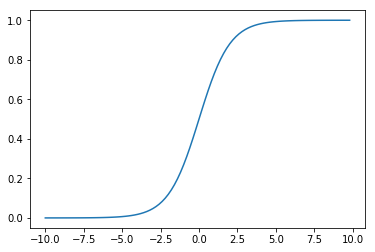

In [4]:
# -10 < x < 10 の範囲で、グラフに描画してみる

x = list(np.arange(-10, 10, 0.2))
y = [sigmoid_func(i) for i in x]

plt.plot(x, y)
plt.show()

#### ソフトマックス関数 ####
複数の出力の合計が1になる関数。

主に、確率を求めるために使われる。

$$ u = exp(x_1) + exp(x_2) + exp(x_3) $$

$$ y_1 = \frac{exp(x_1)}{u}, y_2 = \frac{exp(x_2)}{u}, y_3 = \frac{exp(x_3)}{u} $$

一般化をすると

$$ y_i = \frac{exp(x_i)}{\sum_{K=1}^{j} exp(x_j)} $$


ソフトマックス関数に x0 = 0 と　任意の値を取れる x1 を入力するとシグモイド関数を算出することができる。

In [5]:
def softmax_func(X):
    u = np.sum(np.exp(X))
    return np.exp(X) / u

X = np.random.rand(5) * 1
print(X)
print(softmax_func(X))
print(np.sum(softmax_func(X)))

[0.31528343 0.98201529 0.42507586 0.82358508 0.3838252 ]
[0.14711685 0.28656317 0.16418922 0.24457666 0.1575541 ]
1.0


#### 勾配法 ####

関数の極値を求める方法。
微分によって接点の傾きを算出して再帰的にパラメーターを更新していく。


アルゴリズム
1. 近似関数を定義
2. パラメータの初期値を設定
3. 初期値で近似した時の誤差を誤差関数で評価する
4. 誤差が大きい場合（極値に収束していない場合）、誤差関数の勾配を取り、パラメータを更新する
5. 4を繰り返す

考慮しなくてはいけない点

- 学習率が高いと発散する可能性がある。
- 収束した点が必ずしも最適解に収束するとは限らない。（初期値によっては局所的な極値に収束する可能性があるため）


どこでやめれば良いのか？？
学習した結果、10^-3くらいのスケールで変化するようであれば収束したと、みなして良い

うまく機能させるコツ
特徴量の値を正規化する。（mean-scaleなど、-0.5 < x < 0.5 にするのが好ましい）

learnning-rateについて
iteration - J(θ) 曲線を引いて見てうまく収束しているかを確認する
0.001, 0.003, 0.01, 0.03, 0.1, 0.3 くらいを試してみる。


参考サイト → http://ri2t.kyushu-u.ac.jp/~watanabe/RESERCH/MANUSCRIPT/KOHO/CONVERGE/converge.pdf

勾配ベクトルの絶対値取ればいい感じなのか？


初期状態のプロット


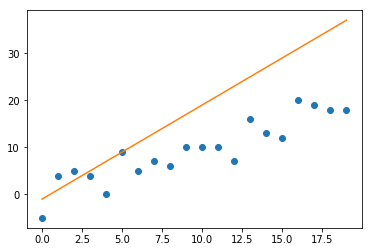

W=[ 1.99734 -1.06773], J=111.8350542637
W=[ 1.99470336 -1.13469724], J=110.1059708098356
W=[ 1.9920898  -1.20091489], J=108.41191026953834
W=[ 1.98949903 -1.26639582], J=106.75205688205362
W=[ 1.98693078 -1.33115262], J=105.12561771043912
W=[ 1.98438477 -1.3951976 ], J=103.531821887419
W=[ 1.98186074 -1.45854278], J=101.96991989007441
W=[ 1.97935842 -1.52119993], J=100.43918284211807
W=[ 1.97687755 -1.58318055], J=98.93890184255949
W=[ 1.97441789 -1.64449591], J=97.46838731962741
W=[ 1.97197917 -1.70515701], J=96.02696840886836
W=[ 1.96956116 -1.76517464], J=94.61399235439315
W=[ 1.96716361 -1.82455932], J=93.22882393229301
W=[ 1.96478628 -1.88332137], J=91.8708448952909
W=[ 1.96242895 -1.94147091], J=90.53945343774072
W=[ 1.96009138 -1.9990178 ], J=89.2340636801254
W=[ 1.95777334 -2.05597172], J=87.95410517224816
W=[ 1.95547462 -2.11234215], J=86.69902241434485
W=[ 1.953195   -2.16813836], J=85.46827439538345
W=[ 1.95093425 -2.22336945], J=84.26133414785029
W=[ 1.94869218 -2.27804429]

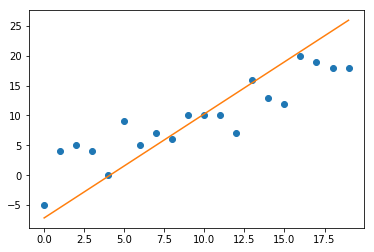

In [6]:
"""
あるトレーニングデータに対して、１次関数を使って近似する例を実装する。

誤差関数 → 二乗誤差関数
近似式 → y = ax +　b
"""

def get_traning_data():
    return [i + np.random.randint(-5,5) for i in range(20)]

def line_func(x, W):
    return W[0] * x + W[1]

def mse(Y, T):
    return np.mean((Y - T) ** 2)

def dmse(X, W, T):
    a = W[0] * X - T
    d_w0 = np.mean(a)
    d_w1 = np.mean(a * X)
    return np.array([d_w0, d_w1])

def fit(a, W, dW):
    return W - a * dW

# main 

data = get_traning_data()
plot = range(20)
init_w = np.array([2, -1])
W = init_w

line = line_func(np.array(plot), init_w)

print('初期状態のプロット')
plt.plot(plot, data, marker='o', linestyle='none')
plt.plot(plot, line)
plt.show()

# 学習

epoc = 1000
t = 5

for i in range(epoc):
    a = 0.0001
    dW = dmse(
        X=line_func(np.array(plot), W),
        W=W,
        T=data
    )

    W = fit(a, W, dW)
    line = line_func(np.array(plot), W)
    J = mse(np.array(line), data)
    print("W={0}, J={1}".format(W, J))
    if np.sqrt(J) < t :
        break
    
line = line_func(np.array(plot), W)
print('定量状態のプロット')
plt.plot(plot, data, marker='o', linestyle='none')
plt.plot(plot, line)
plt.show()

#### 線形基底関数モデル ####

曲線を使って線形回帰をする場合に使うモデル

直線の線形回帰モデルを　`x(x) → φ(x)`　にして考える

M = 4次元 の場合

$$ y(x, \vec{w}) = w_0\phi_0(x) + w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + w_4\phi_4(x) $$

となる。

このように、異なるパラメータを持った複数の関数を足し合わせることで、複雑な曲線を描くことができる。

一般化をすると、

$$ y(x, \vec{w}) = \sum_{j=1}^{M} w_j\phi_j(x) = \vec{W}^T \vec{\phi}(x) $$

この時の `φ(x)` を `基底関数` と呼ぶ

代表的な基底関数として `ガウス関数`　がある

$$ \phi = exp(\frac{- (x - \mu)^2}{2s^2}) $$
$$　\mu : 平均, s : 分散 $$
 
この線形基底関数モデルは解析解を使ってfittingさせることができる。


`Mの決め方について`
Mを増やすほど、誤差関数の値を低くすることができるが、増やしすぎるとオーバーフィッテイングしてしまう。
このオーバーフィッティングを回避する方法として、`フォールドアウト検証`が有効である。

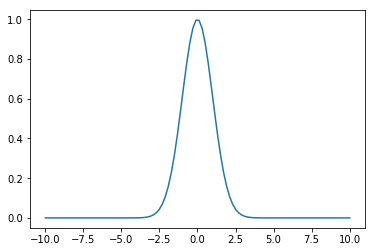

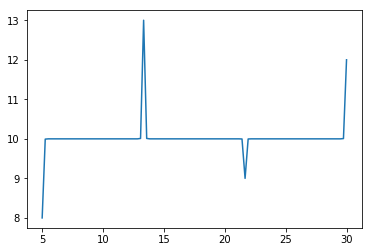

In [7]:
# 線形基底関数モデルを実装

def gauss_func(x, mu, s):
    dx_mu = x-mu
    return np.exp(-np.square(dx_mu) / 2*np.square(s))

# 正規分布になっているか確認
x = np.linspace(-10, 10, 100)
plt.plot(x, gauss_func(x, 0, 1))
plt.show()

# 適当に重ね合わせて曲線を描く
def plot_gauss_func():
    M = 4
    mu = np.linspace(5, 30, M) # M個の分布が等間隔で並ぶように設定
    s = mu[1] - [0] # 分散は隣の中心地まで
    x = np.linspace(5, 30, 100)
    
    W =  np.array([-2, 3,  -1, 2, 10])
    yn = np.array([W[m] * gauss_func(x, mu[m], s) for m in range(M)])
    
    y = yn.sum(axis=0) + W[4]
    
    plt.plot(x, y)
    plt.show()
    
plot_gauss_func()


#### フォールドアウト検証・交差点検証 ####

テストデータを訓練用と検証用に分けて行う学習の手法。
オーバーフィットを抑える効果が期待できる。

`フォールドアウト の手法` 
1. 学習データを n分割 する 
2. 分割したデータの 1/n をテストデータとし、残りのデータで学習データとする 
3. 学習データでパラメータを更新を行って最適化を測る
4. 3の結果を元に、テストデータにfitするMの数値を最適化することで、オーバーフィットを抑えることが出来る 

`データの分割の方法について`
フォールドアウトの結果は分割する際にどのようにデータを選択方法に結果が依存する
この依存を抑えるために用いられるのが、`交差検証(Cross Validation)`である。
データをK分割した際に、K回の最適化を行う。その際に、テストデータとなる分割したデータ群をローテーションしていく手法である。
特にデータ数が少ない時に有効である。


`Cross Validatation の手法`
1. 学習データをn分割する
2. 分割したデータの1番目を学習データ、２番目テストデータとしてデータセットを作る
3. データセットを元に学習して、最適化を測る（この時に、テストデータに対する誤差が最小になるようにする）
4. 2と3を全てのデータセットがテストデータ & 学習データになるように繰り返す。(n-1回)
5. 全ての結果の平均値をとる。

#### 正則化について ####

線形回帰やロジスティック回帰などの最適化を行うとデータに対し極度にフィッティングしてしまい、新たに入ってきたデータに対して、全くフィットしないことがある。
この現象を `オーバーフィッティング` と呼ぶ。
オーバーフィッティングを抑える方法として、正則化がある。

これは、パラメータを最適化する際に誤差関数に正則項を足し合わせて重みをつける手法である。

この時の正規化項はベクトルのノルムを使用する。
一般的に使用されているノルムは `L1` と `L2`　の２種類である。

$$ L1= \sum_{i=0}^{N}|a_i| : マンハッタン距離 $$

$$ L2= \sqrt{\sum_{i=0}^{N}a_i^2} : ユークリッド距離 $$

$$ 正規化項 : \lambda E(\omega) ※ E(\omega) : ノルム $$

ここで、λとは重みのことで、正則化の作用を調節する役割がある。

このように正則化項によって、ノルムが大きすぎる場合に、重み（ペナルティ）をつけることが可能になり、パラメータの複雑さを抑えることができる。
よって、オーバーフィッティングの抑制になるのである。

ちなみに、E(ω)にL1とL2のどちらノルムを使用するかによって、若干特徴が変わる。
`L1ノルム`を使用した場合 `Lasso回帰`とよばれ、
`L2ノルム`を使用した場合 `Ridge回帰`とよばれる。
 `両方` を組み合わせた場合、`Elastic Net` とよばれる。
   
それぞれの特徴についてはTBA

#### 最尤推定について

データの分布から正規分布を推定する時に `μ` と　`σ` を尤度を最小化することによって、求めることを尤度推定という。

#### 尤度とは

ある分布から、0.8 < x <= 1.2 での t に着目したら、t = [0, 0, 0, 1] であった。この時の P(t=1| x) を尤度を考える。

仮に、
$$ P(t=1|x)=w $$
という、単純なモデルを想定して、w = 0.1 とすると、

w = P(t=1|x) = 0.1　なので、 P(t=0|x) = 0.9 になる。
したがって尤度は

(0.9) * 3 * (0.1) * 0.1 = 0.0729
となる。

つまり、w = 0.1 とすると 尤度は 0.0729 になる。
ちなみに、今回の例の場合、w = 0.25 のとき尤度が最大となり、この分布は確率P(t=1|x)が０．２５の時に尤もらしいということであり、これは直感的にも一致する。
よって、尤度とは標本から得た確率の尤もらしさを定量化する値である。

この`尤度の最大値（極値）を求めることで、分布の一番尤もらしい確率を推定することを最尤推定と呼ぶ。`

一般化すると次のようになる

$$  P(t|x) = y^t(1-y)^{1-t} ※ t = 0, 1 の場合 $$

$$  P(T|X) = \prod_{n=0}^{N-1} y_n^{t_n} (1-y_n)^{1-t_n} ※ t = 1....n の場合 $$

この時計算を行いやすいように両辺の log を取って、極小値を求めるように -1 をかけたものを`交差エントロピー誤差`と呼ぶ。

また、交差エントロピー誤差をNで割ったものを`平均交差エントロピー誤差`と呼び、一般的にロジスティック回帰ではこの値の極小値を求めることで、パラメータの最適化を測る。

$$  E(w) logP(T|X) = - 	\frac{1}{N} \sum_{n=0}^{N-1} {t_n logy_n + (1-t_n)log(1-y_n)} $$


In [20]:
# 交差エントロピー誤差の実装
def cross_entropy(t, y):
    monomial1 = t * np.log(y)
    item = (1 - t)
    monomial2 = item * np.log(1-y)
    e_w = - np.mean(monomial1 + monomial2)
    return e_w

def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] + w[1] *x)))
    return y

x = np.array([1, 1, 1, 1])
w = np.array([1, 1])
t = np.array([0, 0, 0, 1])

y = np.array(logistic(x, w))

cross_entropy(t, y) 

1.6269280110429716

数式をコード化する時のプロセス

1. 変数となる数が取りうる値を把握する
2. メソッドの引数となるパラメータを設定する
3. 単項式に分ける
4. 計算順序を決める

数式のテンプレートパターン

$ t_n $ → t[n]

